# TDS FINAL PROJECT

Name: Yosef Zumer

In this notebook, we will try to create a model for predicting Big Mac price by countries economic stats

In [268]:
pip install shap


In [269]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Data Pre-processing


WHO data set: https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated

In [270]:
df_WHO= pd.read_csv( "./sample_data/Life-Expectancy-Data-Updated.csv")
df_WHO.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [271]:
df_WHO.columns
df_WHO.shape

(2864, 21)

Drop part of the data. Keep the data that correlated to economic state of a nation

In [272]:
df_WHO = df_WHO.drop(['Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV','Thinness_ten_nineteen_years',
       'Thinness_five_nine_years' ],axis=1)
df_WHO.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,GDP_per_capita,Population_mln,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,11006,78.53,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,25742,46.44,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1076,1183.21,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,4146,0.75,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,33995,7.91,12.8,1,0,81.7


Big Mac data set: https://www.kaggle.com/datasets/mrmorj/big-mac-index-data

In [273]:
df_MAC= pd.read_csv( "./sample_data/big mac.csv")
df_MAC.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,USD_raw,EUR_raw,GBP_raw,JPY_raw,CNY_raw,GDP_dollar,adj_price,USD_adjusted,EUR_adjusted,GBP_adjusted,JPY_adjusted,CNY_adjusted
0,2000-04-01,ARG,ARS,Argentina,2.50,1.00,2.500000,-0.00398,0.05007,-0.16722,-0.09864,1.09091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-04-01,AUS,AUD,Australia,2.59,1.68,1.541667,-0.38579,-0.35246,-0.48645,-0.44416,0.28939,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-04-01,BRA,BRL,Brazil,2.95,1.79,1.648045,-0.34341,-0.30778,-0.45102,-0.40581,0.37836,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-04-01,CAN,CAD,Canada,2.85,1.47,1.938776,-0.22758,-0.18566,-0.35417,-0.30099,0.62152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-04-01,CHE,CHF,Switzerland,5.90,1.70,3.470588,0.38270,0.45774,0.15609,0.25130,1.90267,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Drop part of the data. Keep the big mac price only in USD

In [274]:
cols_to_keep = ['date', 'name','dollar_price']
df_MAC= df_MAC.reindex(cols_to_keep, axis=1)



In [275]:
df_MAC.columns
df_MAC.shape
df_MAC.head()

,date,name,dollar_price
0,2000-04-01,Argentina,2.500000
1,2000-04-01,Australia,1.541667
2,2000-04-01,Brazil,1.648045
3,2000-04-01,Canada,1.938776
4,2000-04-01,Switzerland,3.470588


Merge the two data sets

In [276]:
#Modify keys for the merge
df_MAC = df_MAC.rename(columns={'name': 'Country', 'dollar_price' : 'mac_price'})
#Keep only the year
df_MAC['date'] = pd.to_datetime(df_MAC['date'])
df_MAC['Year'] = df_MAC['date'].dt.year

#merge
df = pd.merge(df_MAC, df_WHO, on=['Country','Year'], how='inner')
df = df.drop(['date'],axis=1)
df.head()

,Country,mac_price,Year,Region,Infant_deaths,Under_five_deaths,Adult_mortality,GDP_per_capita,Population_mln,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Argentina,2.500000,2000,South America,17.5,19.6,139.3255,10731,36.87,9.1,0,1,73.6
1,Australia,1.541667,2000,Oceania,5.1,6.2,77.0385,45559,19.15,11.9,1,0,79.2
2,Brazil,1.648045,2000,South America,30.4,34.7,186.4955,6788,174.79,5.6,0,1,70.1
3,Canada,1.938776,2000,North America,5.3,6.2,80.9805,34122,30.69,11.0,1,0,79.1
4,Switzerland,3.470588,2000,Rest of Europe,4.7,5.6,76.6770,74013,7.18,11.4,1,0,79.7


Now we can explore on the merged data

In [277]:
print("columns: ")
print(df.columns)

print("shape: ")
print(df.shape)

columns: 
Index(['Country', 'mac_price', 'Year', 'Region', 'Infant_deaths',
       'Under_five_deaths', 'Adult_mortality', 'GDP_per_capita',
       'Population_mln', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy'],
      dtype='object')
shape: 
(672, 13)


In [278]:
df['Region'].value_counts()

Region
Asia                             208
South America                    125
European Union                    92
North America                     69
Rest of Europe                    60
Oceania                           46
Middle East                       32
Africa                            23
Central America and Caribbean     17
Name: count, dtype: int64

In [279]:
df['Country'].value_counts()

Country
Argentina        23
Japan            23
South Africa     23
United States    23
Thailand         23
Sweden           23
Australia        23
Poland           23
New Zealand      23
Malaysia         23
Mexico           23
Singapore        23
Indonesia        23
Hungary          23
Denmark          23
China            23
Chile            23
Switzerland      23
Canada           23
Brazil           23
Philippines      22
Peru             20
Norway           19
Uruguay          18
Colombia         18
Sri Lanka        18
Pakistan         18
Saudi Arabia     18
Ukraine          18
Costa Rica       17
Israel           14
India             9
Vietnam           3
Name: count, dtype: int64

Lets find if there is any null's in the data

In [280]:
df.isnull().sum()

Country                      0
mac_price                    0
Year                         0
Region                       0
Infant_deaths                0
Under_five_deaths            0
Adult_mortality              0
GDP_per_capita               0
Population_mln               0
Schooling                    0
Economy_status_Developed     0
Economy_status_Developing    0
Life_expectancy              0
dtype: int64

Lets explore parts of the data to get a better grasp

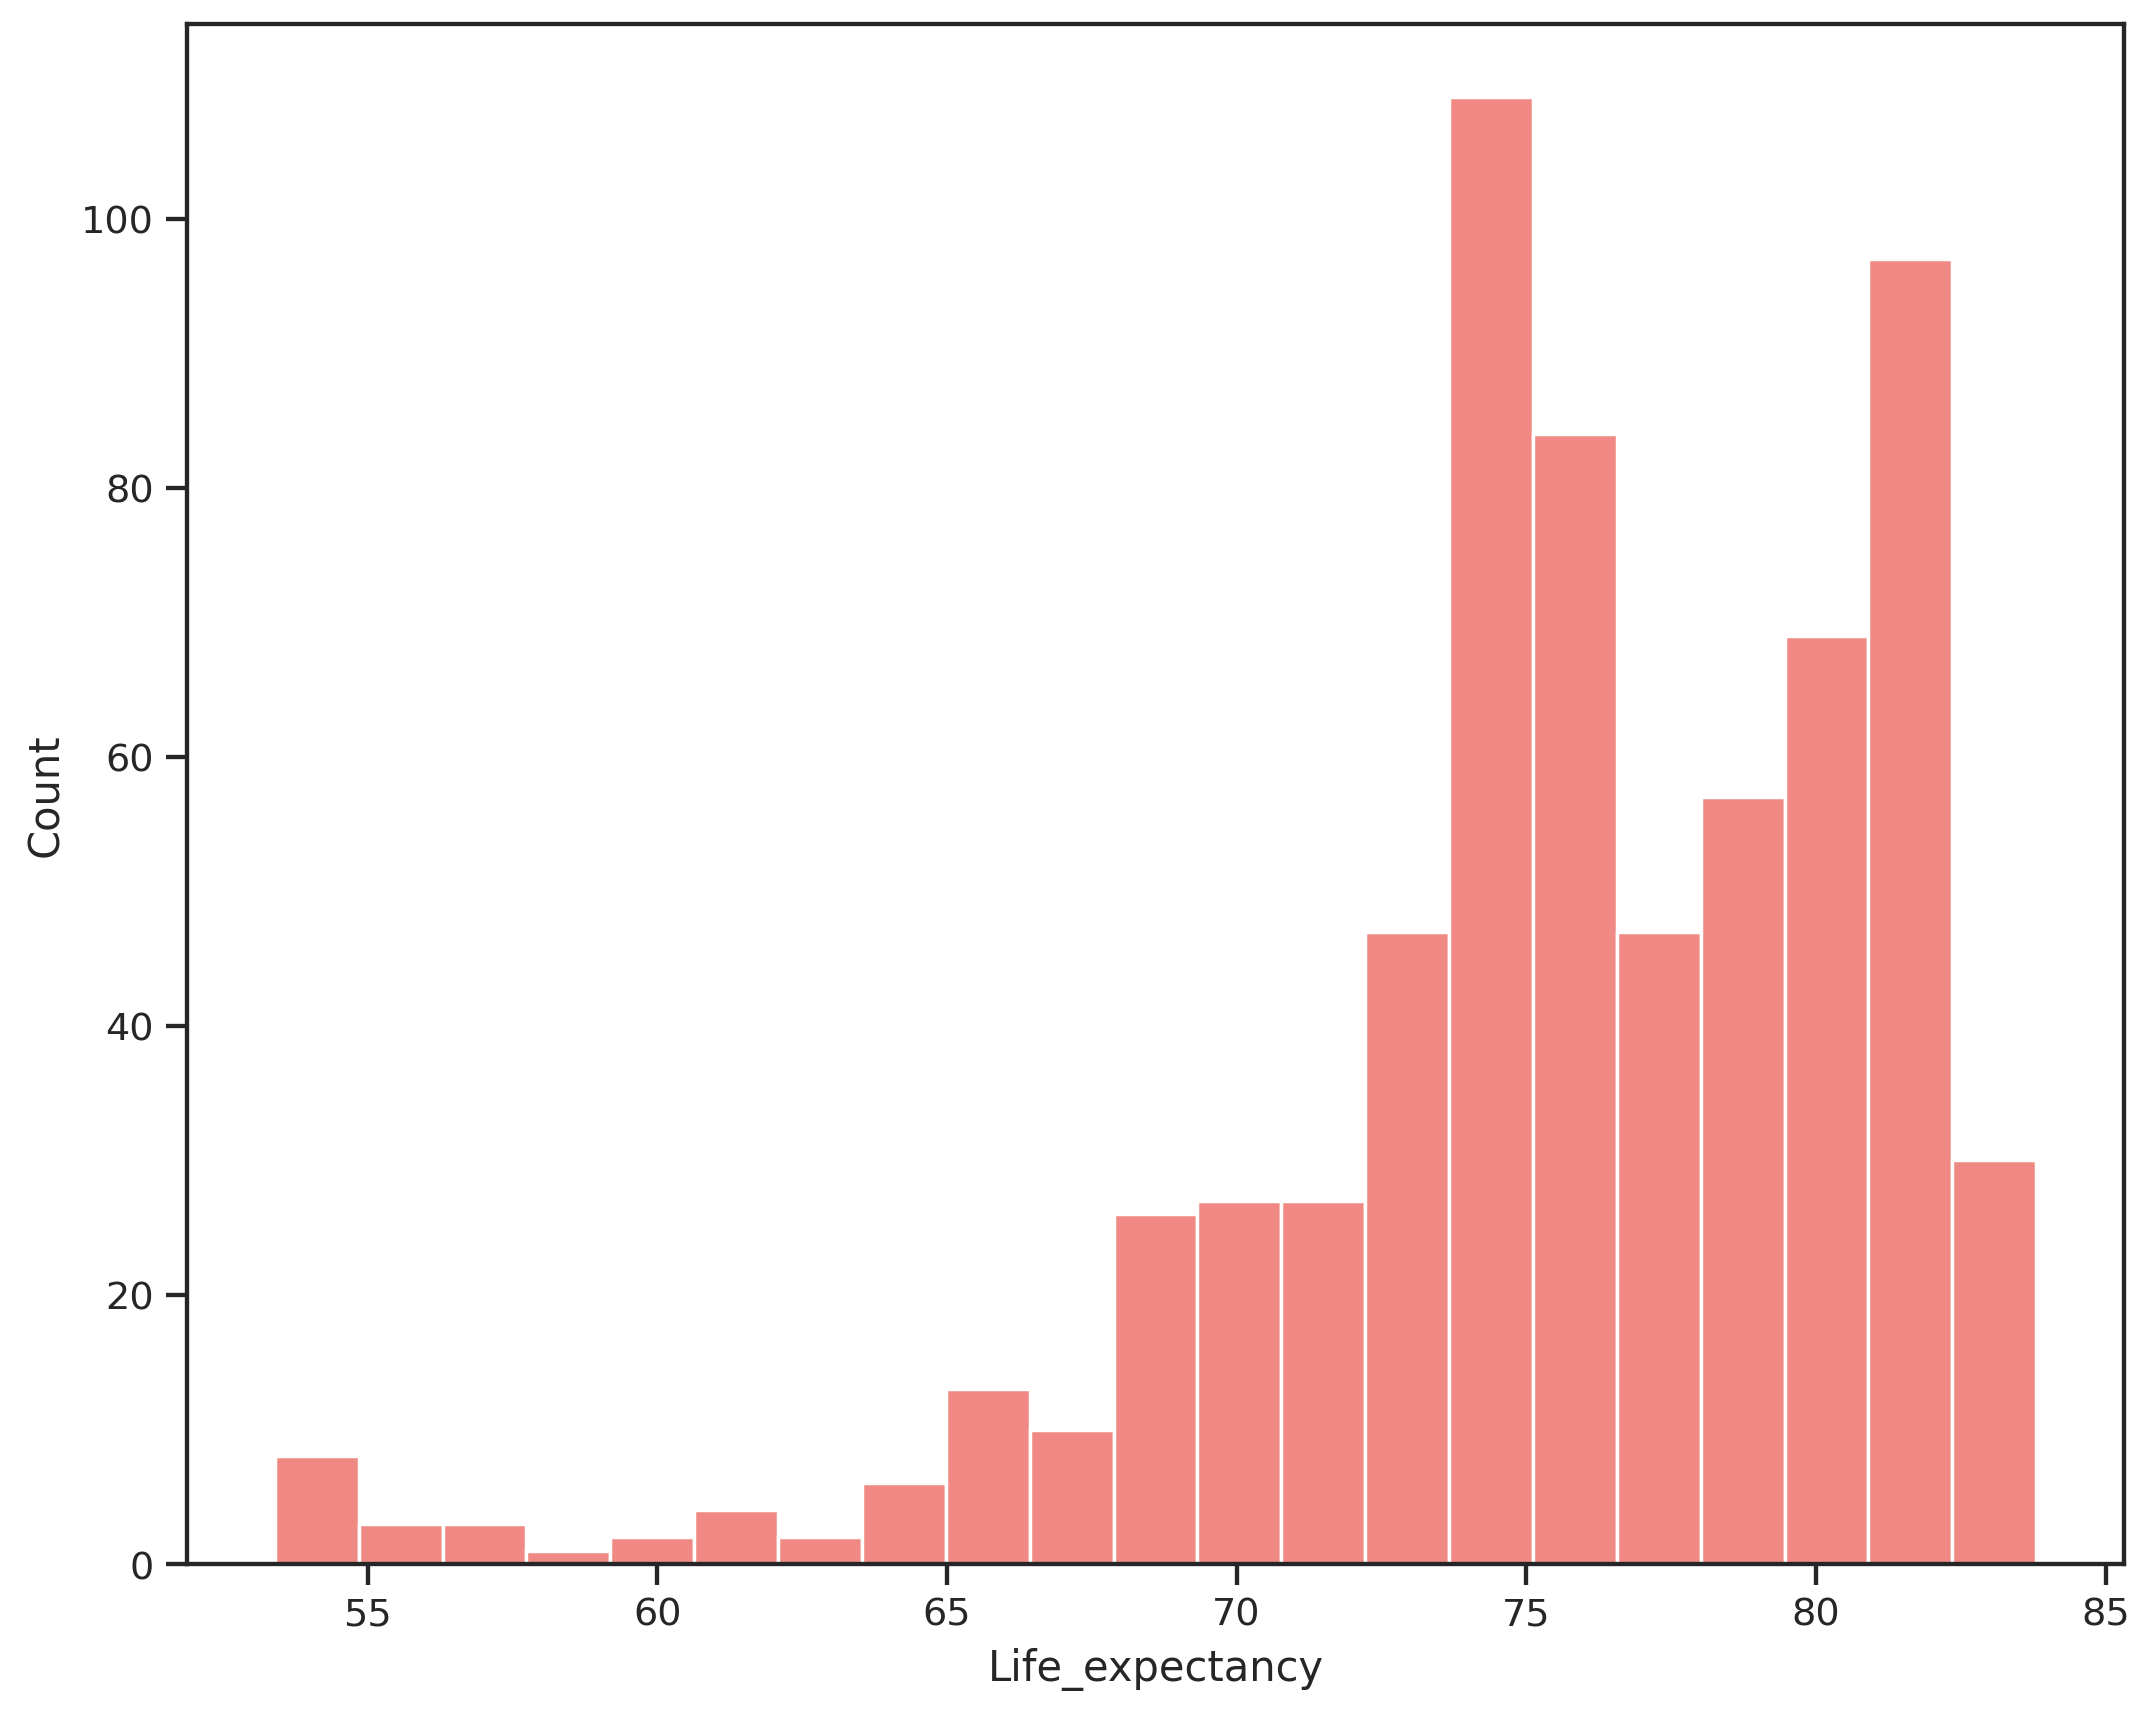

In [349]:

plt.figure(figsize=(10, 8), dpi=250)
sns.set(style='ticks')
sns.histplot(x='Life_expectancy', data=df,color='#eb615a');

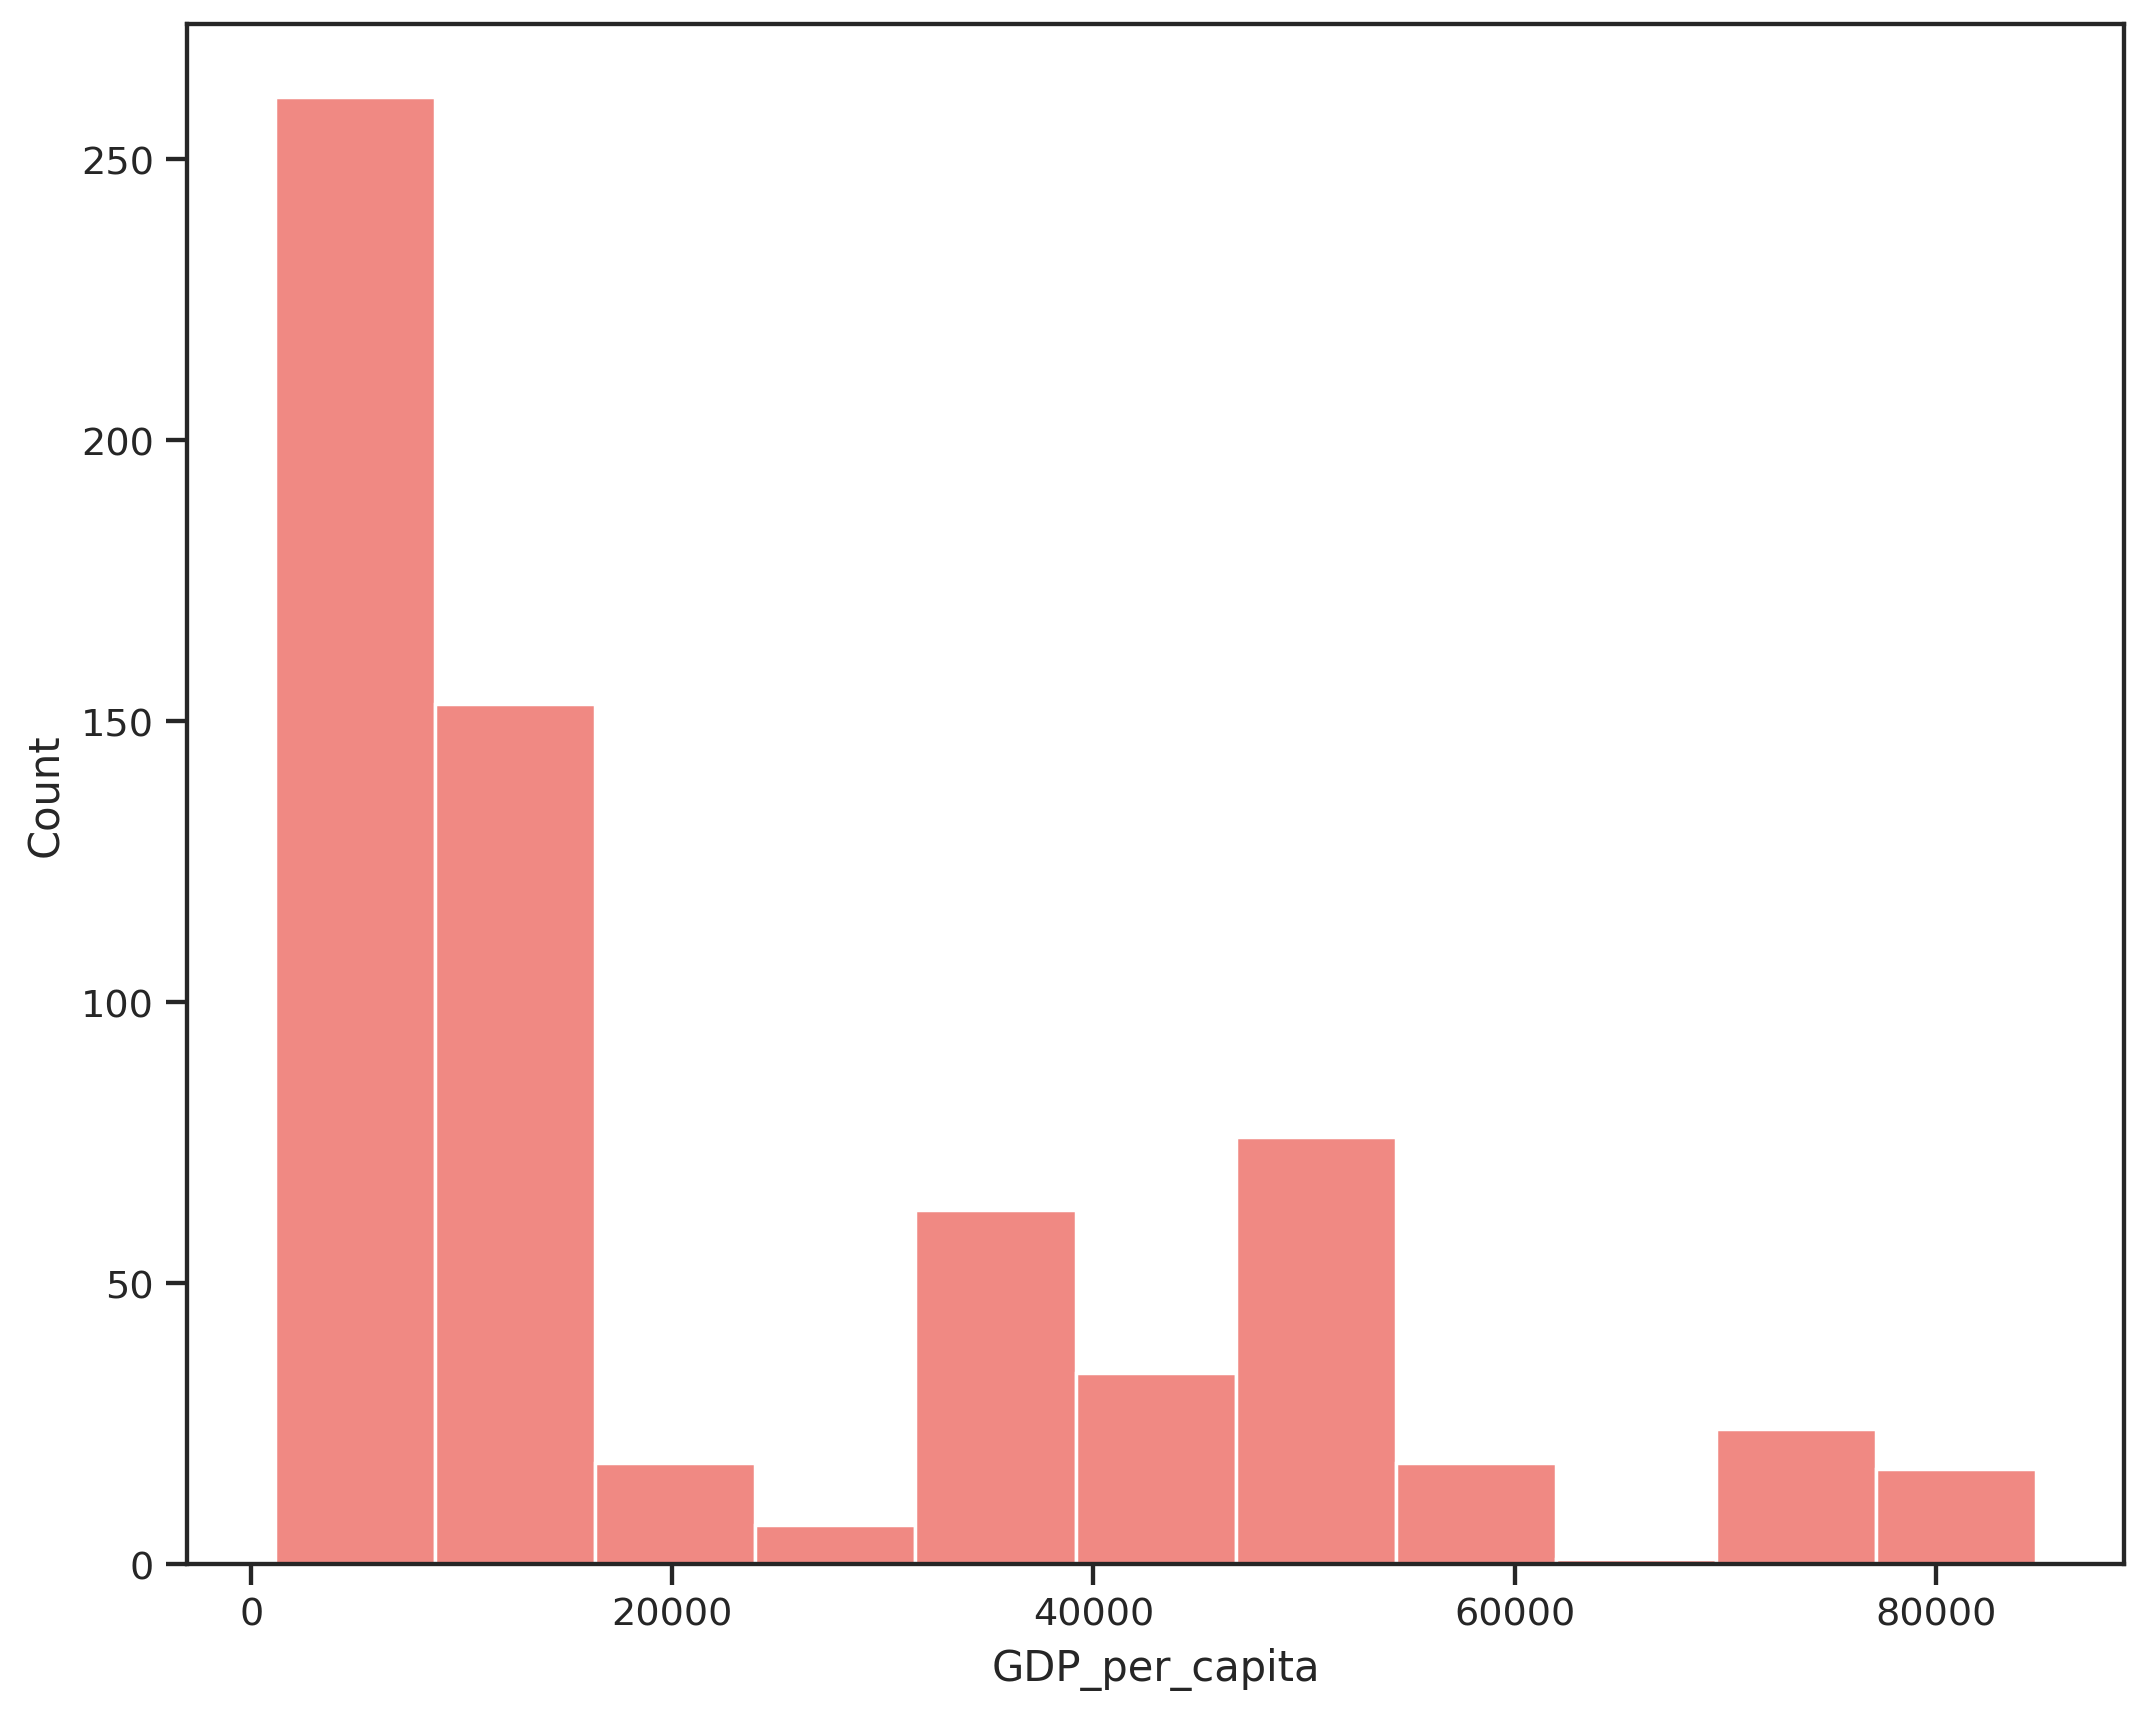

In [342]:

plt.figure(figsize=(10, 8), dpi=250)
sns.set(style='ticks')
sns.histplot(x='GDP_per_capita', data=df,color='#eb615a');

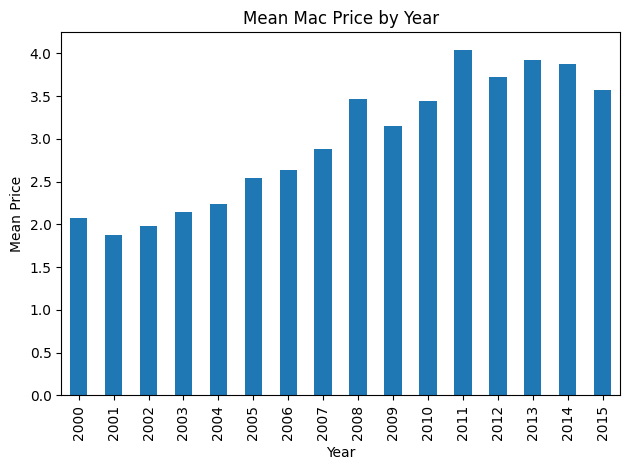

In [281]:
mean_mac_price_each_year = df.groupby(['Year'])['mac_price'].mean()
mean_mac_price_each_year.plot(kind='bar')
plt.title('Mean Mac Price by Year')
plt.xlabel('Year')
plt.ylabel('Mean Price')
plt.tight_layout()
plt.show()

Lets see where mac prices are high



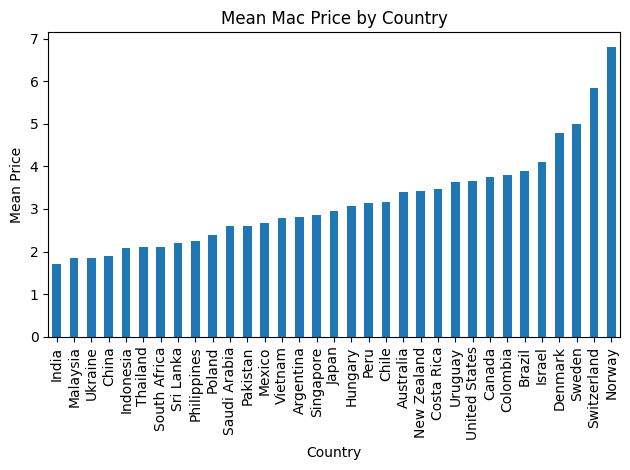

In [282]:
mean_mac_price_each_year = df.groupby(['Country'])['mac_price'].mean().sort_values()
mean_mac_price_each_year.plot(kind='bar')
plt.title('Mean Mac Price by Country')
plt.xlabel('Country')
plt.ylabel('Mean Price')
plt.tight_layout()
plt.show()

Lets see where GDP is high




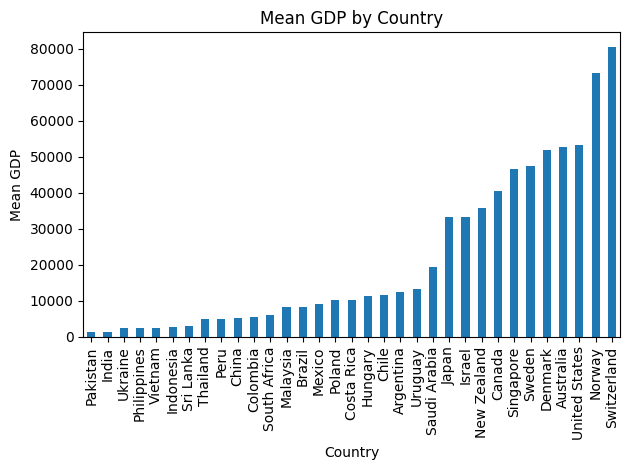

In [283]:
mean_mac_price_each_year = df.groupby(['Country'])['GDP_per_capita'].mean().sort_values()
mean_mac_price_each_year.plot(kind='bar')
plt.title('Mean GDP by Country')
plt.xlabel('Country')
plt.ylabel('Mean GDP')
plt.tight_layout()
plt.show()

Lets see if there is any correlation between GDP and Mac prices

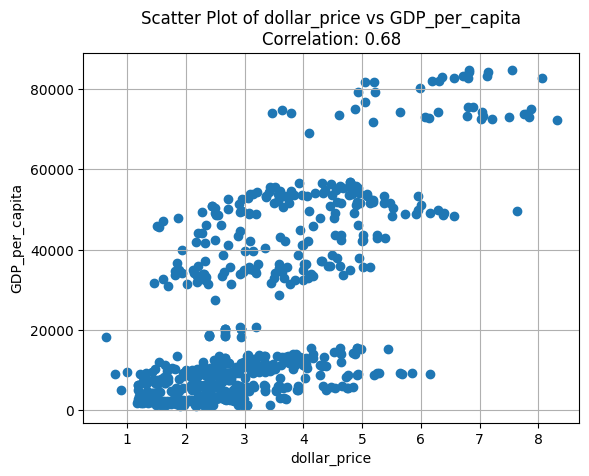

In [284]:
correlation = df['mac_price'].corr(df['GDP_per_capita'])

# Plotting scatter plot
plt.scatter(df['mac_price'], df['GDP_per_capita'])
plt.title('Scatter Plot of dollar_price vs GDP_per_capita\nCorrelation: {:.2f}'.format(correlation))
plt.xlabel('dollar_price')
plt.ylabel('GDP_per_capita')
plt.grid(True)
plt.show()

<Axes: >

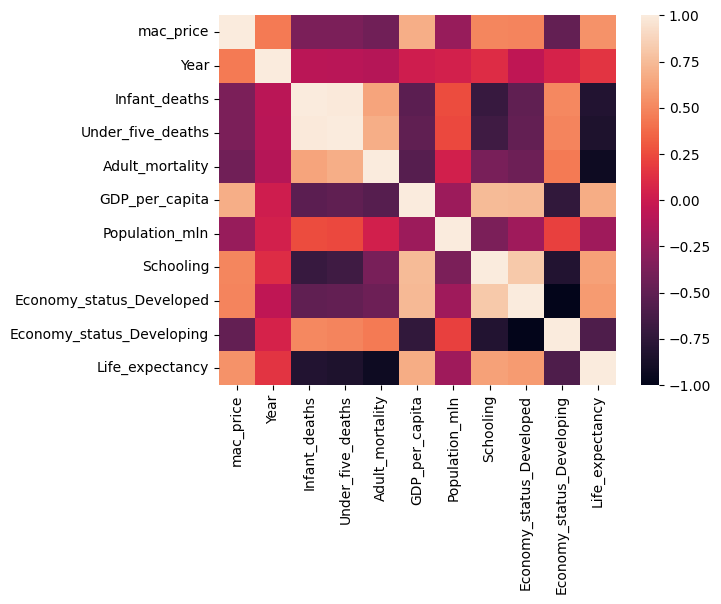

In [336]:
import seaborn as sns

sns.heatmap(df.drop(['Region','Country'],axis=1).corr())

Lets find the attributes with highest correlation to Mac prices

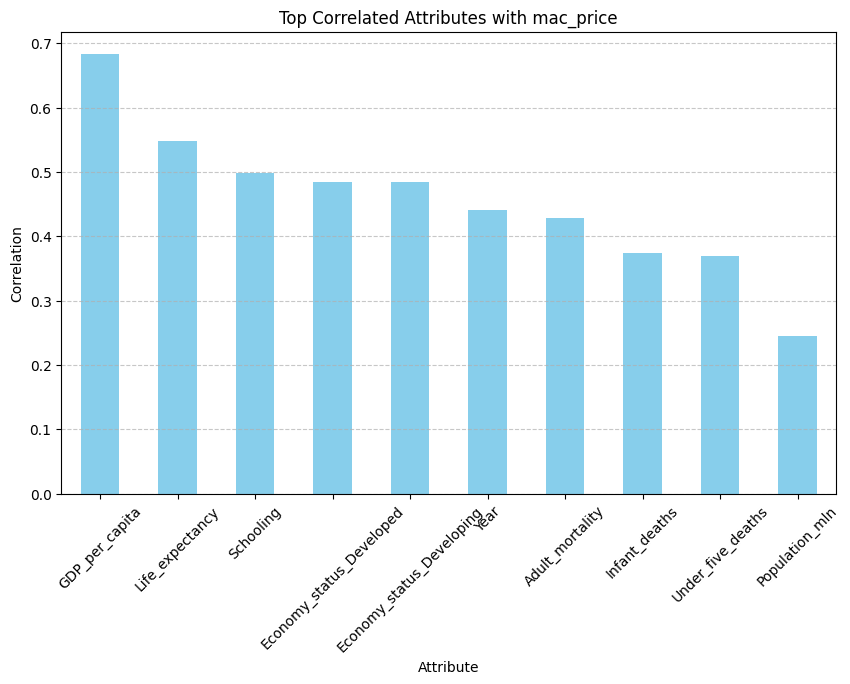

In [285]:
# Calculate correlation between X and all other attributes

numerical_columns = df.select_dtypes(include=['number']).columns

# Calculate correlation between X and all other numerical attributes
correlation = df[numerical_columns].corr()['mac_price']

# Sort the correlation values in descending order
correlation_sorted = correlation.abs().sort_values(ascending=False)

# Select the top correlated attributes (excluding X itself)
top_correlated_attributes = correlation_sorted.drop('mac_price').head(10)  # Change the number as needed

# Plot the top correlated attributes
plt.figure(figsize=(10, 6))
top_correlated_attributes.plot(kind='bar', color='skyblue')
plt.title('Top Correlated Attributes with {}'.format('mac_price'))
plt.xlabel('Attribute')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Let's explore the relationship between Big Mac price and countries location

<ipython-input-345-ca4d1dfc46ab>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Region'], y=df['mac_price'], data=df, palette='Paired')


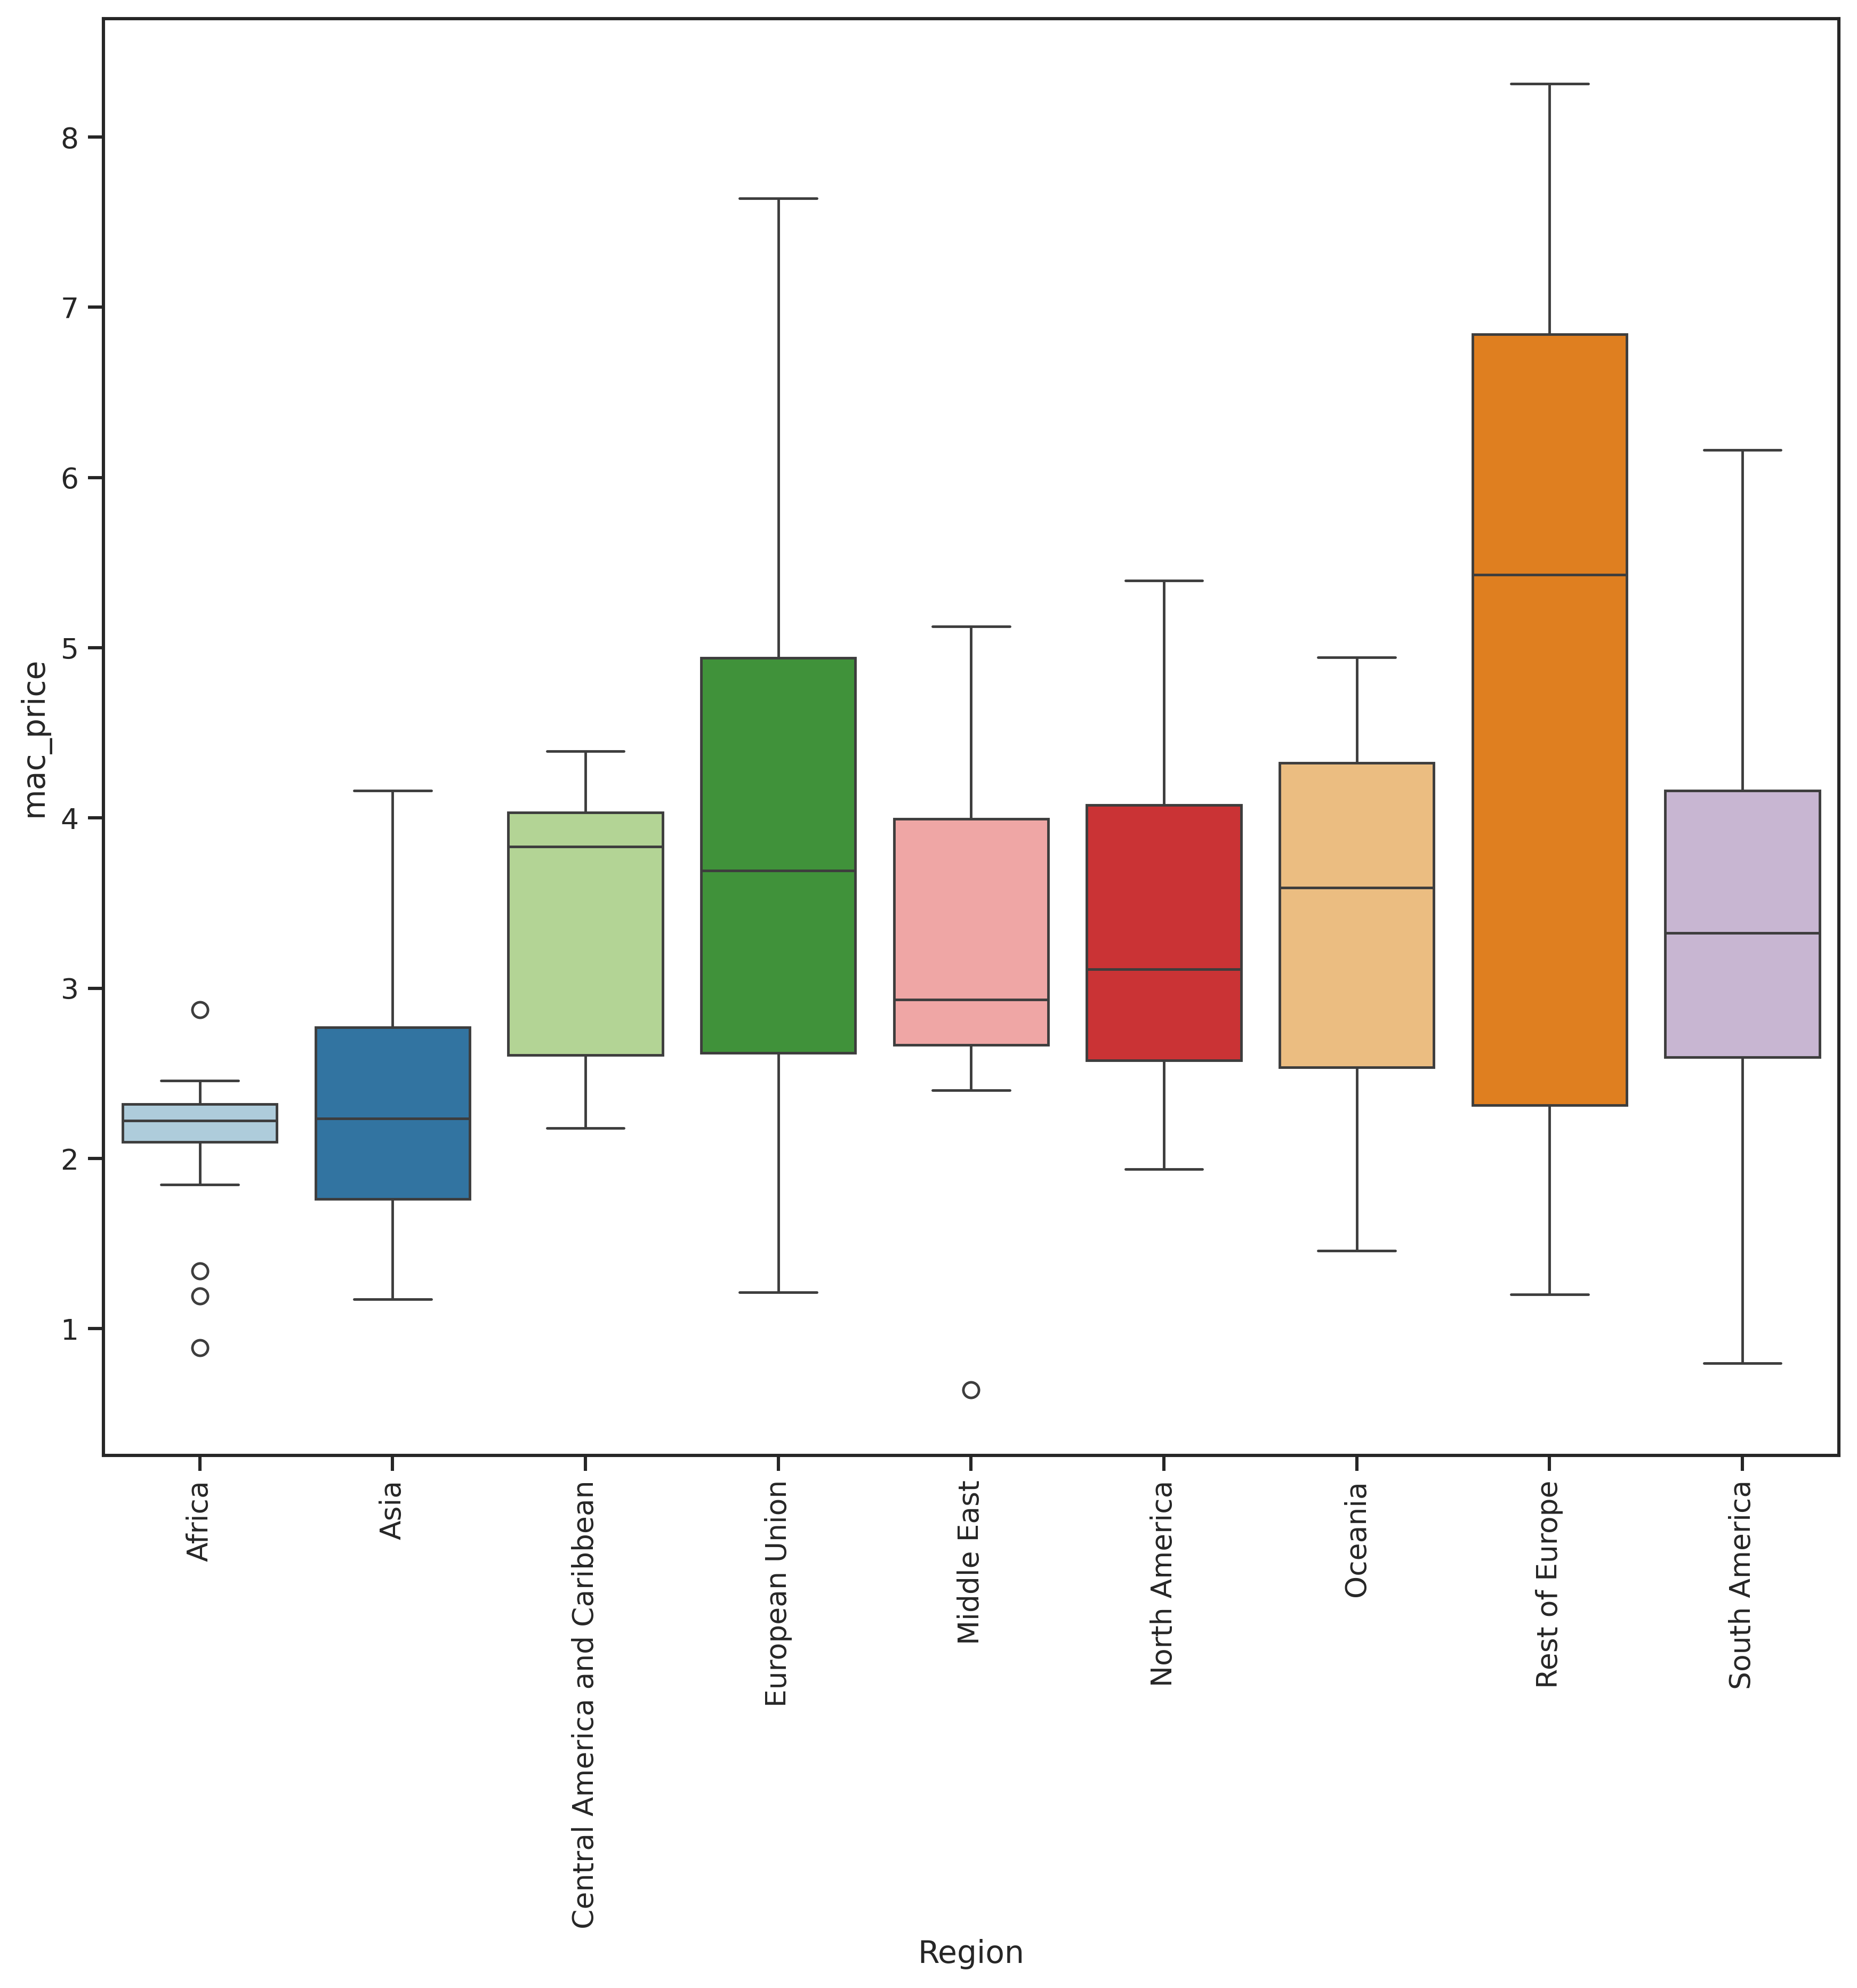

In [345]:
plt.figure(figsize=(12, 10), dpi=350)
sns.boxplot(x=df['Region'], y=df['mac_price'], data=df, palette='Paired')
plt.xticks(rotation=90);

Baseline model

In [286]:
df['Region'] = df['Region'].astype('category')
df['Country'] = df['Country'].astype('category')
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# Specify the column transformer for encoding categorical variables
categorical_features = df.select_dtypes(include=['category']).columns
preprocessor = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_features)], remainder='passthrough')


X = df.drop([ 'mac_price'], axis=1)
y = df["mac_price"]


In [287]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Fit and transform the data using the column transformer
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [288]:
import xgboost as xgb
baseline_model = xgb.XGBRegressor(enable_categorical=True)
baseline_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [289]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = baseline_model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.11524513370734595
R2 Score: 0.9534317279231699


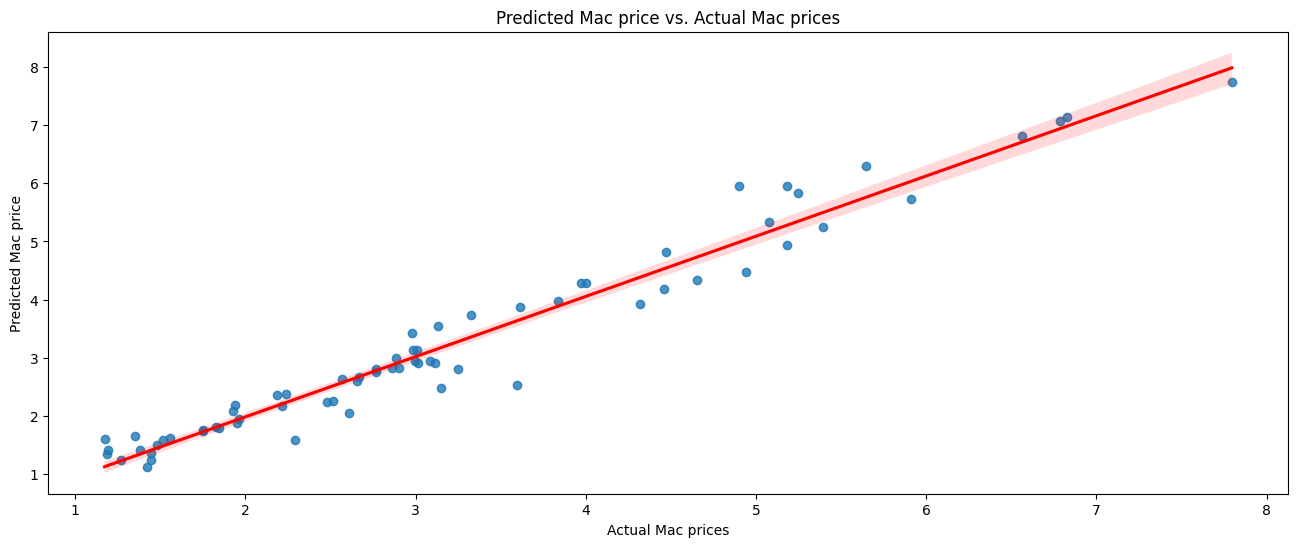

In [290]:
plt.figure(figsize=(16, 6))
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})
plt.title("Predicted Mac price vs. Actual Mac prices")
plt.xlabel("Actual Mac prices")
plt.ylabel("Predicted Mac price")
plt.show()

 10 fold cross-validation process

In [291]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


# Initialize KFold with 10 folds
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(baseline_model, X, y, cv=kfold, scoring='r2')

print("Cross-Validation Scores:", scores)
print("Mean R^2 Score:", scores.mean())
print("Standard Deviation of R^2 Scores:", scores.std())


Cross-Validation Scores: [0.95859594 0.9193446  0.92503467 0.96221728 0.9038627  0.95514605
 0.92568575 0.94311377 0.9337738  0.92320145]
Mean R^2 Score: 0.9349975997040032
Standard Deviation of R^2 Scores: 0.01819516621772035


# Improvement

The results are too good. Let's try to use a test set that contains data about countries that do not apear in the training set

In [292]:


from sklearn.model_selection import train_test_split
import random
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# Specify the column transformer for encoding categorical variables

preprocessor = ColumnTransformer(transformers=[('encoder', OneHotEncoder(handle_unknown='ignore'), ['Region'])],
                                 remainder='passthrough')



# Get the unique countries in the dataset
unique_countries = df['Country'].unique()


# Randomly select countries for the training set
train_countries = set(random.sample(set(unique_countries), k=int(len(unique_countries)*0.9)))


# Extract the rows corresponding to the selected countries for the training set
train_set = df[df['Country'].isin(train_countries)]

# Extract the rows corresponding to the remaining countries for the test set
test_set = df[~df['Country'].isin(train_countries)]



X_train = train_set.drop(columns=['mac_price', 'Country'])
Y_train = train_set['mac_price']
X_test = test_set.drop(columns=['mac_price', 'Country'])
Y_test = test_set['mac_price']

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


<ipython-input-292-13db0787725b>:17: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  train_countries = set(random.sample(set(unique_countries), k=int(len(unique_countries)*0.9)))


In [293]:
import xgboost as xgb
baseline_model = xgb.XGBRegressor(enable_categorical=True)
baseline_model.fit(X_train, Y_train)

from sklearn.metrics import mean_squared_error, r2_score
y_pred = baseline_model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(Y_test, y_pred))
print("R2 Score:", r2_score(Y_test, y_pred))

Mean Squared Error: 1.3827906733599382
R2 Score: 0.4096313938397843


As we can see from the r2 score of above 0.9, the model went down to 0.4

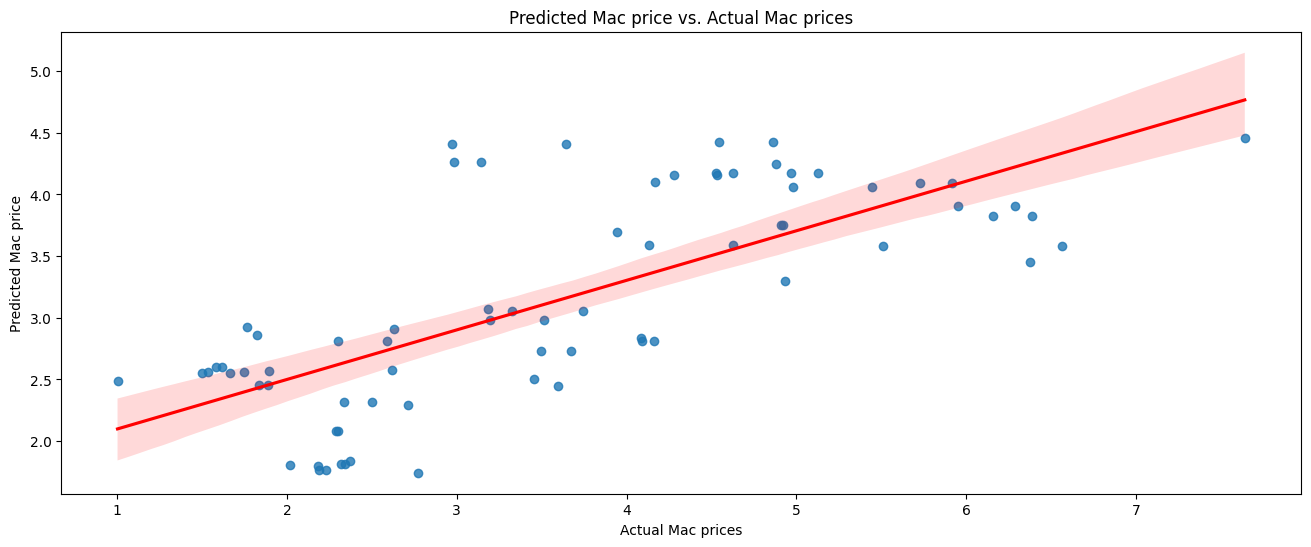

In [294]:
plt.figure(figsize=(16, 6))
sns.regplot(x=Y_test, y=y_pred, line_kws={"color": "red"})
plt.title("Predicted Mac price vs. Actual Mac prices")
plt.xlabel("Actual Mac prices")
plt.ylabel("Predicted Mac price")
plt.show()

Lets try NN

In [295]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Initialize the MLPRegressor
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100,100,100,100,100,100,
                                                 100,100,100,100,100,100,
                                                 100,100,100,100,100,),  #  hidden layer with 100 neurons
                             activation='relu',  # Activation function for hidden layers
                             solver='adam',  # Optimizer algorithm
                             max_iter=1000,  # Maximum number of iterations
                             random_state=42)  # Random seed for reproducibility

# Train the MLPRegressor on the training data
mlp_regressor.fit(X_train, Y_train)

# Predict the target variable for the test set
pred = mlp_regressor.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(Y_test, pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2_score(Y_test, pred))



Mean Squared Error: 2.8964312109168855
R2 Score: -0.23660224918428185


The NN results are also bad. After playing around with the NN hyper params the best r2 score was around 0.5. Its hard to know the reason because NN's are hard to explain. Lets try SVM and understand it with Sharp vals

In [297]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVR model
svr = SVR(kernel='linear')
svr.fit(X_train_scaled,
        Y_train)

# Predict prices
y_pred_svm = svr.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(Y_test, y_pred_svm)
r2 = r2_score(Y_test, y_pred_svm)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Predicted vs Actual prices
pred_vs_actual = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred_svm})
print(pred_vs_actual.head())

Mean Squared Error: 0.9736225169886303
R^2 Score: 0.5843216335238037
      Actual  Predicted
11  2.773585   2.387274
17  2.714932   2.745558
31  2.370968   2.543885
38  2.334630   2.911048
53  2.015385   2.685082


Mach better (:

Lets preform KFold validtion

In [298]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


# Initialize KFold with 10 folds
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(svr, X_train_scaled, Y_train, cv=kfold, scoring='r2')

print("Cross-Validation Scores:", scores)
print("Mean R^2 Score:", scores.mean())
print("Standard Deviation of R^2 Scores:", scores.std())

Cross-Validation Scores: [0.73844249 0.68821387 0.80268371 0.87315576 0.81302569 0.7986738
 0.77415514 0.85398041 0.80439064 0.81167249]
Mean R^2 Score: 0.7958394008607959
Standard Deviation of R^2 Scores: 0.05037868636467632


['Region_Africa' 'Region_Asia' 'Region_Central America and Caribbean'
 'Region_European Union' 'Region_Middle East' 'Region_North America'
 'Region_Oceania' 'Region_Rest of Europe' 'Region_South America' 'Year'
 'Infant_deaths' 'Under_five_deaths' 'Adult_mortality' 'GDP_per_capita'
 'Population_mln' 'Schooling' 'Economy_status_Developed'
 'Economy_status_Developing' 'Life_expectancy']


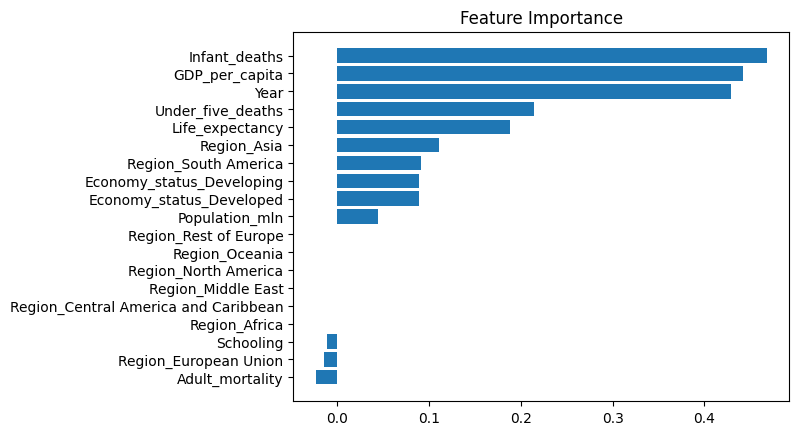

In [323]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Compute permutation feature importance
result = permutation_importance(svr, X_test_scaled, Y_test, n_repeats=10, random_state=42)

# Plot feature importance
importance = result.importances_mean
# feature_names = train_set.drop(['mac_price', 'Country'],axis=1).columns
encoded_feature_names = preprocessor.named_transformers_['encoder'].get_feature_names_out(['Region'])
feature_names = np.concatenate([encoded_feature_names, train_set.drop(['mac_price', 'Country' , 'Region'],axis=1).columns])
print(feature_names)
sorted_idx = np.argsort(importance)

plt.barh(range(len(sorted_idx)), importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.title('Feature Importance')
plt.show()


To my suprise KNN didn't worked good at all, will my assumption was that countries from the same areas and same economic stats would give good predictions. That my be corralated to the size of the data